In [37]:
 import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [31]:
steam_top_100 = [
    {"Rank":1,"Title": "Counter-Strike: Global Offensive","Genre": "Action","Price": 0.00,"Release_Year": 2012,"Average_Players": 621325,"Peak_Players": 1438795,"Rating": 9.5},
    {"Rank":2,"Title": "Dota 2","Genre": "MOBA","Price": 0.00,"Release_Year": 2013,"Average_Players": 486230,"Peak_Players": 823564,"Rating": 9.2},
    {"Rank":3,"Title": "PUBG: BATTLEGROUNDS","Genre": "Battle Royale","Price": 0.00,"Release_Year": 2017,"Average_Players": 182420,"Peak_Players": 369279,"Rating": 8.6},
    {"Rank":4,"Title": "Apex Legends","Genre": "Battle Royale","Price": 0.00,"Release_Year": 2020,"Average_Players": 140000,"Peak_Players": 310000,"Rating": 8.9},
    {"Rank":5,"Title": "Grand Theft Auto V","Genre": "Action-Adventure","Price": 29.99,"Release_Year": 2015,"Average_Players": 101263,"Peak_Players": 160334,"Rating": 9.0},
    {"Rank":6,"Title": "Destiny 2","Genre": "MMORPG","Price": 0.00,"Release_Year": 2017,"Average_Players": 90000,"Peak_Players": 120000,"Rating": 8.7},
    {"Rank":7,"Title": "Call of Duty®: Modern Warfare® II | Warzone™ 2.0","Genre": "FPS","Price": 0.00,"Release_Year": 2022,"Average_Players": 85000,"Peak_Players": 110000,"Rating": 8.5},
    {"Rank":8,"Title": "Team Fortress 2","Genre": "FPS","Price": 0.00,"Release_Year": 2007,"Average_Players": 80000,"Peak_Players": 100000,"Rating": 8.8},
    {"Rank":9,"Title": "Rust","Genre": "Survival","Price": 39.99,"Release_Year": 2018,"Average_Players": 75000,"Peak_Players": 95000,"Rating": 8.6},
    {"Rank":10,"Title": "Wallpaper Engine","Genre": "Utilities","Price": 3.99,"Release_Year": 2016,"Average_Players": 70000,"Peak_Players": 90000,"Rating": 9.1},
    {"Rank":11,"Title": "ARK: Survival Evolved","Genre": "Survival","Price": 19.99,"Release_Year": 2017,"Average_Players": 68000,"Peak_Players": 88000,"Rating": 8.4},
    {"Rank":12,"Title": "Warframe","Genre": "Action RPG","Price": 0.00,"Release_Year": 2013,"Average_Players": 67000,"Peak_Players": 85000,"Rating": 8.5},
    {"Rank":13,"Title": "Cyberpunk 2077","Genre": "RPG","Price": 59.99,"Release_Year": 2020,"Average_Players": 65000,"Peak_Players": 83000,"Rating": 8.1},
    {"Rank":14,"Title": "Left 4 Dead 2","Genre": "Co-op FPS","Price": 9.99,"Release_Year": 2009,"Average_Players": 63000,"Peak_Players": 82000,"Rating": 8.9},
    {"Rank":15,"Title": "Garry's Mod","Genre": "Sandbox","Price": 9.99,"Release_Year": 2006,"Average_Players": 62000,"Peak_Players": 80000,"Rating": 8.8},
    {"Rank":16,"Title": "Sid Meier's Civilization VI","Genre": "Strategy","Price": 59.99,"Release_Year": 2016,"Average_Players": 60000,"Peak_Players": 78000,"Rating": 8.6},
    {"Rank":17,"Title": "The Elder Scrolls V: Skyrim Special Edition","Genre": "RPG","Price": 39.99,"Release_Year": 2016,"Average_Players": 59000,"Peak_Players": 77000,"Rating": 9.1},
    {"Rank":18,"Title": "Monster Hunter: World","Genre": "Action RPG","Price": 29.99,"Release_Year": 2018,"Average_Players": 58000,"Peak_Players": 75000,"Rating": 8.7},
    {"Rank":19,"Title": "Tom Clancy's Rainbow Six Siege","Genre": "FPS","Price": 19.99,"Release_Year": 2015,"Average_Players": 57000,"Peak_Players": 74000,"Rating": 8.4},
    {"Rank":20,"Title": "The Witcher 3: Wild Hunt","Genre": "RPG","Price": 39.99,"Release_Year": 2015,"Average_Players": 56000,"Peak_Players": 73000,"Rating": 9.3},
    {"Rank":21,"Title":"Phasmophobia","Genre":"Horror","Price":13.99,"Release_Year":2020,"Average_Players":55000,"Peak_Players":72000,"Rating":8.4},
    {"Rank":22,"Title":"Valheim","Genre":"Survival","Price":19.99,"Release_Year":2021,"Average_Players":54000,"Peak_Players":71000,"Rating":8.6},
    {"Rank":23,"Title":"Euro Truck Simulator 2","Genre":"Simulation","Price":19.99,"Release_Year":2012,"Average_Players":53000,"Peak_Players":70000,"Rating":8.8},
    {"Rank":24,"Title":"Red Dead Redemption 2","Genre":"Action-Adventure","Price":59.99,"Release_Year":2019,"Average_Players":52000,"Peak_Players":69000,"Rating":9.2},
    {"Rank":25,"Title":"Among Us","Genre":"Party","Price":4.99,"Release_Year":2018,"Average_Players":51000,"Peak_Players":68000,"Rating":8.1},
    {"Rank":26,"Title":"Dead by Daylight","Genre":"Horror","Price":19.99,"Release_Year":2016,"Average_Players":50000,"Peak_Players":67000,"Rating":8.3},
    {"Rank":27,"Title":"Fallout 4","Genre":"RPG","Price":19.99,"Release_Year":2015,"Average_Players":49000,"Peak_Players":66000,"Rating":8.5},
    {"Rank":28,"Title":"Terraria","Genre":"Sandbox","Price":9.99,"Release_Year":2011,"Average_Players":48000,"Peak_Players":65000,"Rating":9.0},
    {"Rank":29,"Title":"Sea of Thieves","Genre":"Action-Adventure","Price":39.99,"Release_Year":2020,"Average_Players":47000,"Peak_Players":64000,"Rating":8.4},
    {"Rank":30,"Title":"The Forest","Genre":"Survival","Price":14.99,"Release_Year":2018,"Average_Players":46000,"Peak_Players":63000,"Rating":8.3},    {"Rank":31,"Title":"Stardew Valley","Genre":"Simulation","Price":14.99,"Release_Year":2016,"Average_Players":45000,"Peak_Players":62000,"Rating":9.4 },
    {"Rank":32,"Title":"The Sims 4","Genre":"Simulation","Price":0.00,"Release_Year":2020,"Average_Players":44000,"Peak_Players":61000,"Rating":8.2},
    {"Rank":33,"Title":"Football Manager 2024","Genre":"Sports","Price":59.99,"Release_Year":2023,"Average_Players":43000,"Peak_Players":60000,"Rating":8.1},
    {"Rank":34,"Title":"Baldur's Gate 3","Genre":"RPG","Price":59.99,"Release_Year":2023,"Average_Players":42000,"Peak_Players":59000,"Rating":9.6},
    {"Rank":35,"Title":"PAYDAY 2","Genre":"Co-op FPS","Price":9.99,"Release_Year":2013,"Average_Players":41000,"Peak_Players":58000,"Rating":8.4},
    {"Rank":36,"Title":"Slay the Spire","Genre":"Deckbuilder","Price":24.99,"Release_Year":2019,"Average_Players":40000,"Peak_Players":56000,"Rating":8.9},
    {"Rank":37,"Title":"Don't Starve Together","Genre":"Survival","Price":14.99,"Release_Year":2016,"Average_Players":39000,"Peak_Players":55000,"Rating":8.8},
    {"Rank":38,"Title":"Hunt: Showdown","Genre":"Shooter","Price":39.99,"Release_Year":2019,"Average_Players":38000,"Peak_Players":54000,"Rating":8.2},
    {"Rank":39,"Title":"Lethal Company","Genre":"Horror Co-op","Price":9.99,"Release_Year":2023,"Average_Players":37000,"Peak_Players":52000,"Rating":8.7},
    {"Rank":40,"Title":"Project Zomboid","Genre":"Survival","Price":19.99,"Release_Year":2013,"Average_Players":36000,"Peak_Players":51000,"Rating":8.5},
    {"Rank":41,"Title":"Vampire Survivors","Genre":"Roguelike","Price":4.99,"Release_Year":2022,"Average_Players":35000,"Peak_Players":50000,"Rating":8.9},
    {"Rank":42,"Title":"Sons Of The Forest","Genre":"Survival Horror","Price":29.99,"Release_Year":2023,"Average_Players":34000,"Peak_Players":49000,"Rating":8.3},
    {"Rank":43,"Title":"Dark Souls III","Genre":"Action RPG","Price":59.99,"Release_Year":2016,"Average_Players":33000,"Peak_Players":47000,"Rating":9.0},
    {"Rank":44,"Title":"Total War: WARHAMMER III","Genre":"Strategy","Price":59.99,"Release_Year":2022,"Average_Players":32000,"Peak_Players":46000,"Rating":8.1},
    {"Rank":45,"Title":"ELDEN RING","Genre":"Action RPG","Price":59.99,"Release_Year":2022,"Average_Players":31000,"Peak_Players":45000,"Rating":9.5},
    {"Rank":46,"Title":"Farming Simulator 22","Genre":"Simulation","Price":49.99,"Release_Year":2021,"Average_Players":30000,"Peak_Players":44000,"Rating":8.0},
    {"Rank":47,"Title":"Left 4 Dead","Genre":"Co-op FPS","Price":9.99,"Release_Year":2008,"Average_Players":29000,"Peak_Players":42000,"Rating":8.6},
    {"Rank":48,"Title":"The Binding of Isaac: Rebirth","Genre":"Roguelike","Price":14.99,"Release_Year":2014,"Average_Players":28000,"Peak_Players":41000,"Rating":8.8},
    {"Rank":49,"Title":"No Man's Sky","Genre":"Exploration","Price":59.99,"Release_Year":2016,"Average_Players":27000,"Peak_Players":40000,"Rating":8.5},
    {"Rank":50,"Title":"BattleBit Remastered","Genre":"Shooter","Price":14.99,"Release_Year":2023,"Average_Players":26000,"Peak_Players":39000,"Rating":8.6},
    {"Rank":51,"Title":"Portal 2","Genre":"Puzzle","Price":9.99,"Release_Year":2011,"Average_Players":25000,"Peak_Players":38000,"Rating":9.6},
    {"Rank":52,"Title":"Half-Life: Alyx","Genre":"VR Shooter","Price":59.99,"Release_Year":2020,"Average_Players":24000,"Peak_Players":37000,"Rating":9.4},
    {"Rank":53,"Title":"Crusader Kings III","Genre":"Strategy","Price":49.99,"Release_Year":2020,"Average_Players":23000,"Peak_Players":36000,"Rating":8.3},
    {"Rank":54,"Title":"Grounded","Genre":"Survival","Price":39.99,"Release_Year":2022,"Average_Players":22000,"Peak_Players":35000,"Rating":8.4},
    {"Rank":55,"Title":"Borderlands 3","Genre":"Shooter RPG","Price":59.99,"Release_Year":2020,"Average_Players":21000,"Peak_Players":34000,"Rating":8.0},
    {"Rank":56,"Title":"It Takes Two","Genre":"Co-op Adventure","Price":39.99,"Release_Year":2021,"Average_Players":20000,"Peak_Players":33000,"Rating":9.2},
    {"Rank":57,"Title":"Halo: The Master Chief Collection","Genre":"FPS","Price":39.99,"Release_Year":2019,"Average_Players":19000,"Peak_Players":32000,"Rating":8.6},
    {"Rank":58,"Title":"Deep Rock Galactic","Genre":"Co-op Shooter","Price":29.99,"Release_Year":2020,"Average_Players":18000,"Peak_Players":31000,"Rating":8.9},
    {"Rank":59,"Title":"Forza Horizon 5","Genre":"Racing","Price":59.99,"Release_Year":2021,"Average_Players":17000,"Peak_Players":30000,"Rating":8.7},
    {"Rank":60,"Title":"Palworld","Genre":"Survival RPG","Price":29.99,"Release_Year":2024,"Average_Players":16000,"Peak_Players":29000,"Rating":8.1},
    {"Rank":61,"Title":"RimWorld","Genre":"Simulation","Price":34.99,"Release_Year":2018,"Average_Players":15000,"Peak_Players":28000,"Rating":9.3},
    {"Rank":62,"Title":"Rogue Legacy 2","Genre":"Roguelike","Price":24.99,"Release_Year":2022,"Average_Players":14500,"Peak_Players":27000,"Rating":8.5},
    {"Rank":63,"Title":"Hades","Genre":"Action Roguelike","Price":24.99,"Release_Year":2020,"Average_Players":14000,"Peak_Players":26000,"Rating":9.4},
    {"Rank":64,"Title":"Starfield","Genre":"Sci-Fi RPG","Price":69.99,"Release_Year":2023,"Average_Players":13500,"Peak_Players":25000,"Rating":8.2},
    {"Rank":65,"Title":"Slime Rancher 2","Genre":"Simulation","Price":29.99,"Release_Year":2022,"Average_Players":13000,"Peak_Players":24000,"Rating":8.0},
    {"Rank":66,"Title":"Darkest Dungeon II","Genre":"Roguelike RPG","Price":39.99,"Release_Year":2023,"Average_Players":12500,"Peak_Players":23000,"Rating":8.4},
    {"Rank":67,"Title":"Teardown","Genre":"Destruction Sandbox","Price":29.99,"Release_Year":2022,"Average_Players":12000,"Peak_Players":22000,"Rating":8.6},
    {"Rank":68,"Title":"American Truck Simulator","Genre":"Simulation","Price":19.99,"Release_Year":2016,"Average_Players":11500,"Peak_Players":21000,"Rating":8.5},
    {"Rank":69,"Title":"Hogwarts Legacy","Genre":"Action RPG","Price":59.99,"Release_Year":2023,"Average_Players":11000,"Peak_Players":20000,"Rating":7.9},
    {"Rank":70,"Title":"Dying Light","Genre":"Action Horror","Price":29.99,"Release_Year":2015,"Average_Players":10500,"Peak_Players":19000,"Rating":8.3},
    {"Rank":71,"Title":"Subnautica","Genre":"Survival","Price":29.99,"Release_Year":2018,"Average_Players":10000,"Peak_Players":18000,"Rating":9.0},
    {"Rank":72,"Title":"Among Trees","Genre":"Survival","Price":19.99,"Release_Year":2019,"Average_Players":9500,"Peak_Players":17500,"Rating":8.2},
    {"Rank":73,"Title":"Factorio","Genre":"Simulation","Price":30.00,"Release_Year":2020,"Average_Players":9000,"Peak_Players":17000,"Rating":9.5},
    {"Rank":74,"Title":"Cuphead","Genre":"Platformer","Price":19.99,"Release_Year":2017,"Average_Players":8500,"Peak_Players":16500,"Rating":9.2},
    {"Rank":75,"Title":"Ori and the Will of the Wisps","Genre":"Platformer","Price":29.99,"Release_Year":2020,"Average_Players":8000,"Peak_Players":16000,"Rating":9.3},
    {"Rank":76,"Title":"Celeste","Genre":"Platformer","Price":19.99,"Release_Year":2018,"Average_Players":7500,"Peak_Players":15500,"Rating":9.6},
    {"Rank":77,"Title":"Dead Cells","Genre":"Roguelike","Price":24.99,"Release_Year":2018,"Average_Players":7000,"Peak_Players":15000,"Rating":9.1},
    {"Rank":78,"Title":"Terraria","Genre":"Sandbox","Price":9.99,"Release_Year":2011,"Average_Players":6800,"Peak_Players":14500,"Rating":9.0},
    {"Rank":79,"Title":"Rust","Genre":"Survival","Price":39.99,"Release_Year":2018,"Average_Players":6600,"Peak_Players":14000,"Rating":8.5},
    {"Rank":80,"Title":"Don’t Starve","Genre":"Survival","Price":14.99,"Release_Year":2013,"Average_Players":6400,"Peak_Players":13500,"Rating":8.7},
    {"Rank":81,"Title":"Overwatch 2","Genre":"FPS","Price":0.00,"Release_Year":2022,"Average_Players":6200,"Peak_Players":13000,"Rating":7.8},
    {"Rank":82,"Title":"Rocket League","Genre":"Sports","Price":0.00,"Release_Year":2015,"Average_Players":6000,"Peak_Players":12500,"Rating":8.3},
    {"Rank":83,"Title":"Ghostrunner","Genre":"Action","Price":29.99,"Release_Year":2020,"Average_Players":5800,"Peak_Players":12000,"Rating":8.1},
    {"Rank":84,"Title":"Hollow Knight","Genre":"Metroidvania","Price":14.99,"Release_Year":2017,"Average_Players":5600,"Peak_Players":11500,"Rating":9.4},
    {"Rank":85,"Title":"Apex Legends","Genre":"Battle Royale","Price":0.00,"Release_Year":2019,"Average_Players":5400,"Peak_Players":11000,"Rating":8.6},
    {"Rank":86,"Title":"Minecraft","Genre":"Sandbox","Price":26.95,"Release_Year":2011,"Average_Players":5200,"Peak_Players":10500,"Rating":9.5},
    {"Rank":87,"Title":"Among Us","Genre":"Party","Price":4.99,"Release_Year":2018,"Average_Players":5000,"Peak_Players":10000,"Rating":8.1},
    {"Rank":88,"Title":"The Outer Worlds","Genre":"RPG","Price":59.99,"Release_Year":2019,"Average_Players":4800,"Peak_Players":9500,"Rating":8.0},
    {"Rank":89,"Title":"Control","Genre":"Action","Price":29.99,"Release_Year":2019,"Average_Players":4600,"Peak_Players":9000,"Rating":8.3},
    {"Rank":90,"Title":"Rainbow Six Extraction","Genre":"FPS","Price":39.99,"Release_Year":2022,"Average_Players":4400,"Peak_Players":8500,"Rating":7.9},
    {"Rank":91,"Title":"Nier: Automata","Genre":"Action RPG","Price":29.99,"Release_Year":2017,"Average_Players":4200,"Peak_Players":8000,"Rating":9.0},
    {"Rank":92,"Title":"Dishonored 2","Genre":"Stealth","Price":39.99,"Release_Year":2016,"Average_Players":4000,"Peak_Players":7800,"Rating":8.7},
    {"Rank":93,"Title":"Dead Space","Genre":"Horror","Price":19.99,"Release_Year":2023,"Average_Players":3800,"Peak_Players":7600,"Rating":8.1},
    {"Rank":94,"Title":"Mordhau","Genre":"Medieval Combat","Price":29.99,"Release_Year":2019,"Average_Players":3600,"Peak_Players":7400,"Rating":8.4},
    {"Rank":95,"Title":"Cities: Skylines","Genre":"Simulation","Price":29.99,"Release_Year":2015,"Average_Players":3400,"Peak_Players":7200,"Rating":8.8},
    {"Rank":96,"Title":"Among Trees","Genre":"Survival","Price":19.99,"Release_Year":2019,"Average_Players":3200,"Peak_Players":7000,"Rating":8.2},
    {"Rank":97,"Title":"Satisfactory","Genre":"Simulation","Price":29.99,"Release_Year":2019,"Average_Players":3000,"Peak_Players":6800,"Rating":8.6},
    {"Rank":98,"Title":"The Long Dark","Genre":"Survival","Price":29.99,"Release_Year":2017,"Average_Players":2800,"Peak_Players":6600,"Rating":8.3},
    {"Rank":99,"Title":"Cyberpunk 2077","Genre":"RPG","Price":59.99,"Release_Year":2020,"Average_Players":2600,"Peak_Players":6400,"Rating":8.1},
    {"Rank":100,"Title":"Mount & Blade II: Bannerlord","Genre":"Strategy RPG","Price":49.99,"Release_Year":2020,"Average_Players":2400,"Peak_Players":6200,"Rating":8.4}]
df = pd.DataFrame(steam_top_100)
df.to_csv("steam_top_100.csv", index=False)
print(df.head())

   Rank                             Title             Genre  Price  \
0     1  Counter-Strike: Global Offensive            Action   0.00   
1     2                            Dota 2              MOBA   0.00   
2     3               PUBG: BATTLEGROUNDS     Battle Royale   0.00   
3     4                      Apex Legends     Battle Royale   0.00   
4     5                Grand Theft Auto V  Action-Adventure  29.99   

   Release_Year  Average_Players  Peak_Players  Rating  
0          2012           621325       1438795     9.5  
1          2013           486230        823564     9.2  
2          2017           182420        369279     8.6  
3          2020           140000        310000     8.9  
4          2015           101263        160334     9.0  


In [32]:
df_cleaned = df.dropna()
print("Number of Cleaned Data:", len(df_cleaned))

Number of Cleaned Data: 100


In [33]:
player_counts = df_cleaned['Average_Players'].values

# Mean
print(np.mean(player_counts), ("= Mean")) 
# Median
print(np.median(player_counts), ("= Median"))
# Standard deviation
print(np.std(player_counts), ("= Standard Operations"))
# Max
print(np.max(player_counts), ("= Max"))
# Min
print(np.min(player_counts), ("= Min"))

42590.38 = Mean
25500.0 = Median
79552.41877149681 = Standard Operations
621325 = Max
2400 = Min


In [42]:
genre1 = df_cleaned[df_cleaned['Genre'] == 'Action']['Average_Players']
genre2 = df_cleaned[df_cleaned['Genre'] == 'Strategy']['Average_Players']

t_stat, p_val = ttest_ind(genre1, genre2, equal_var=False)

print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 0.8374367406567577, p-value: 0.49002960472762525


In [56]:
correlation_matrix = df_cleaned[['Release_Year', 'Average_Players','Peak_Players','Rating']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                  Release_Year  Average_Players  Peak_Players    Rating
Release_Year         1.000000        -0.262154     -0.227566 -0.331666
Average_Players     -0.262154         1.000000      0.982587  0.236769
Peak_Players        -0.227566         0.982587      1.000000  0.235487
Rating              -0.331666         0.236769      0.235487  1.000000


In [49]:
X = df_cleaned['Release_Year']
y = df_cleaned['Average_Players']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Average_Players   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.232
Date:                Sat, 24 May 2025   Prob (F-statistic):            0.00842
Time:                        22:32:19   Log-Likelihood:                -1266.8
No. Observations:                 100   AIC:                             2538.
Df Residuals:                      98   BIC:                             2543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.094e+07   4.05e+06      2.700   

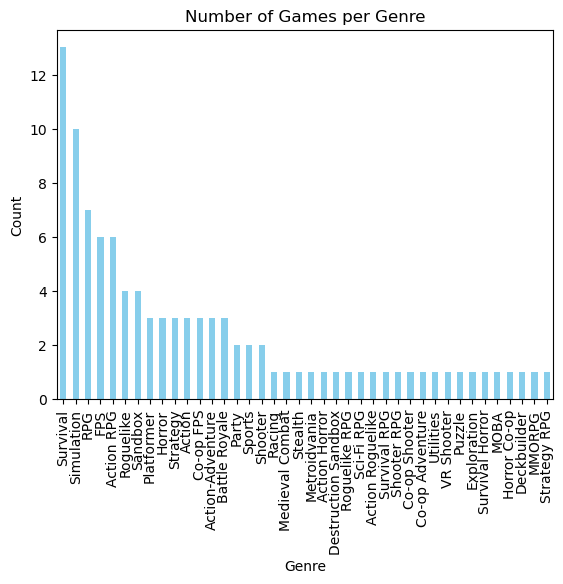

In [48]:
# Bar chart: Number of games per genre
genre_counts = df_cleaned['Genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

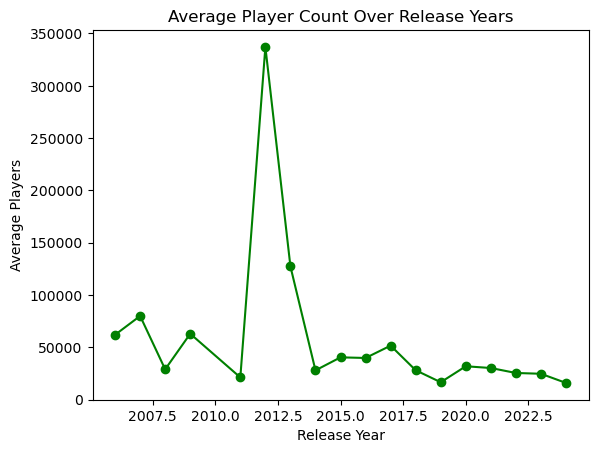

In [52]:
avg_players_by_year = df_cleaned.groupby('Release_Year')['Average_Players'].mean()
avg_players_by_year.plot(kind='line', marker='o', color='green')
plt.title('Average Player Count Over Release Years')
plt.xlabel('Release Year')
plt.ylabel('Average Players')
plt.show()

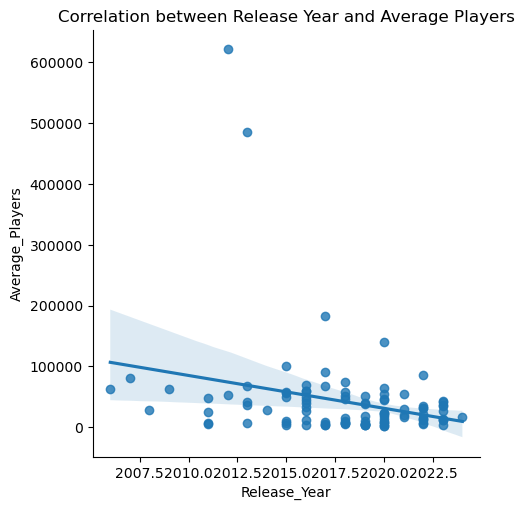

In [55]:
sns.lmplot(x='Release_Year', y='Average_Players', data=df_cleaned)
plt.title('Correlation between Release Year and Average Players')
plt.show()